In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = r"C:\Users\Hp\Desktop\thyroid_cancer_risk_data.csv"
df = pd.read_csv(file_path, encoding='ascii')

# Displaying the head of the dataframe and basic statistics
head_df = df.head()
stats_df = df.describe(include='all')

head_df, stats_df

(   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
 0           1   66    Male   Russia  Caucasian             No   
 1           2   29    Male  Germany   Hispanic             No   
 2           3   86    Male  Nigeria  Caucasian             No   
 3           4   75  Female    India      Asian             No   
 4           5   35  Female  Germany    African            Yes   
 
   Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
 0                Yes                No      No      No       No       9.37   
 1                Yes                No      No      No       No       1.83   
 2                 No                No      No      No       No       6.26   
 3                 No                No      No      No       No       4.10   
 4                Yes                No      No      No       No       9.10   
 
    T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
 0      1.67      6.16         1.08                 Low   

In [2]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [3]:
# to know the number of rows and columns in the data
df.shape

(212691, 17)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

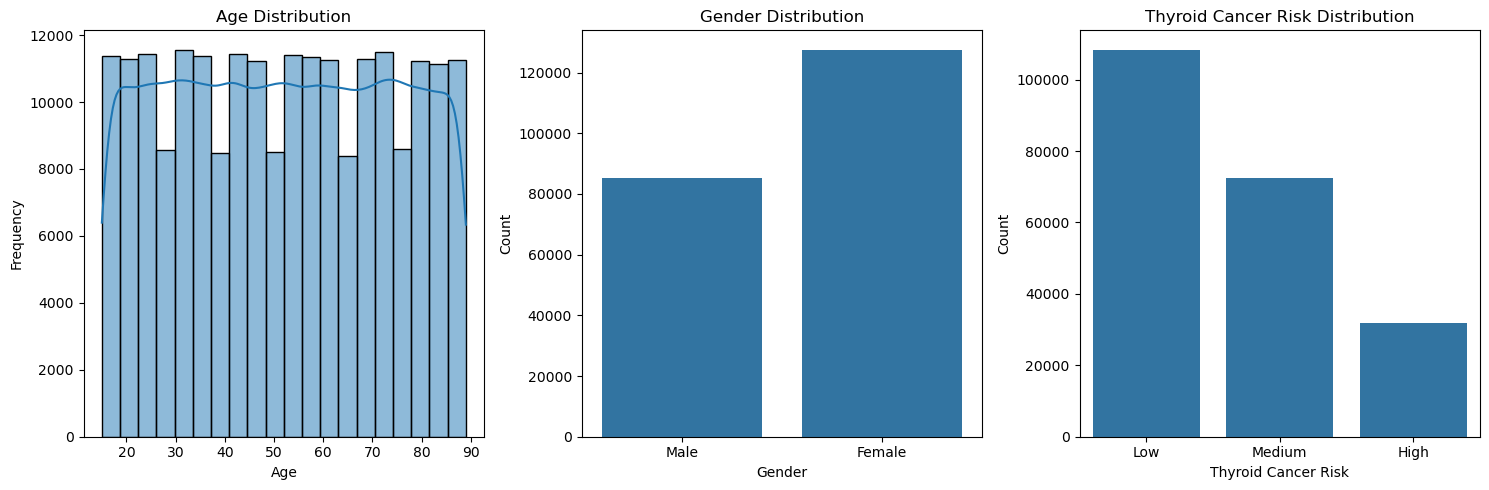

In [6]:
# Setting up the visualizations
plt.figure(figsize=(15, 5))

# 1. Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Gender distribution
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Thyroid cancer risk distribution
plt.subplot(1, 3, 3)
sns.countplot(x='Thyroid_Cancer_Risk', data=df)
plt.title('Thyroid Cancer Risk Distribution')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

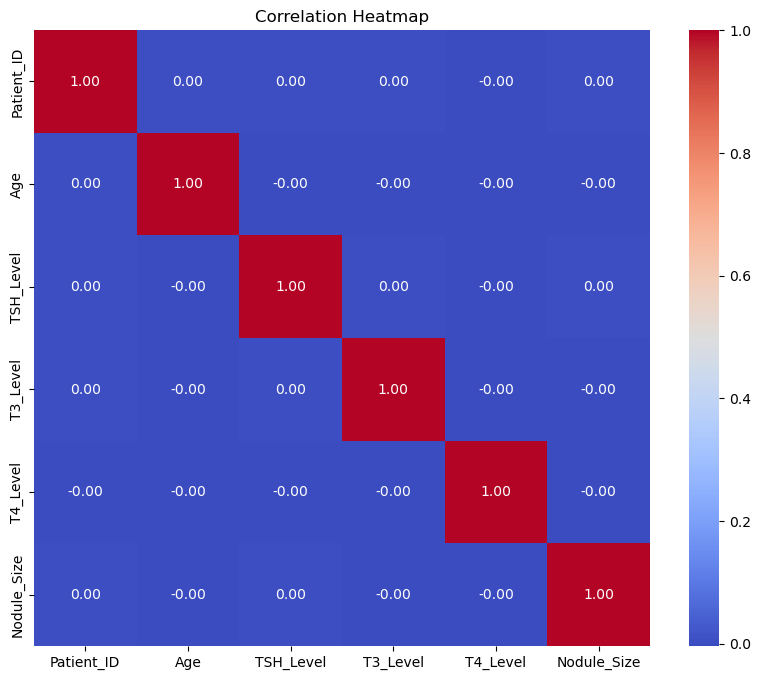

In [7]:
# Calculating the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Setting up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

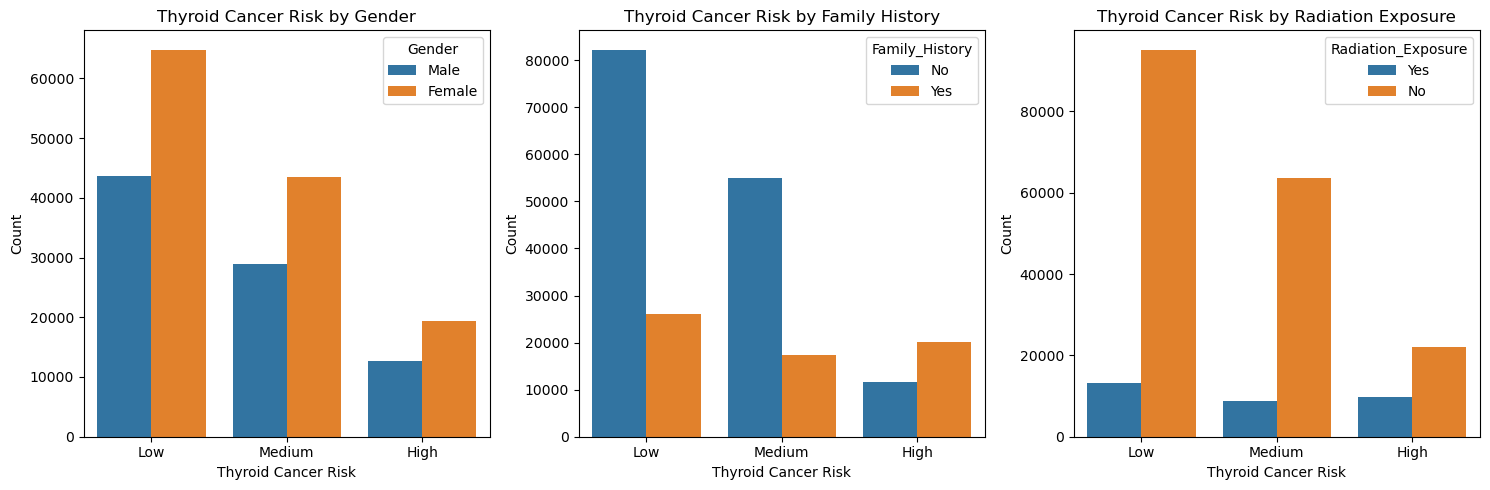

In [8]:
# Setting up the visualizations for categorical variables
plt.figure(figsize=(15, 5))

# 1. Thyroid cancer risk by gender
plt.subplot(1, 3, 1)
sns.countplot(x='Thyroid_Cancer_Risk', hue='Gender', data=df)
plt.title('Thyroid Cancer Risk by Gender')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Count')

# 2. Thyroid cancer risk by family history
plt.subplot(1, 3, 2)
sns.countplot(x='Thyroid_Cancer_Risk', hue='Family_History', data=df)
plt.title('Thyroid Cancer Risk by Family History')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Count')

# 3. Thyroid cancer risk by radiation exposure
plt.subplot(1, 3, 3)
sns.countplot(x='Thyroid_Cancer_Risk', hue='Radiation_Exposure', data=df)
plt.title('Thyroid Cancer Risk by Radiation Exposure')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [9]:
# to import the label encoder module
from sklearn import preprocessing

# to create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# applying to the categorical columns
df['Patient_ID'] = label_encoder.fit_transform(df['Patient_ID'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])
df['Family_History'] = label_encoder.fit_transform(df['Family_History'])
df['Radiation_Exposure'] = label_encoder.fit_transform(df['Radiation_Exposure'])
df['Iodine_Deficiency'] = label_encoder.fit_transform(df['Iodine_Deficiency'])
df['Smoking'] = label_encoder.fit_transform(df['Smoking'])
df['Obesity'] = label_encoder.fit_transform(df['Obesity'])
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
df['TSH_Level'] = label_encoder.fit_transform(df['TSH_Level'])
df['T3_Level'] = label_encoder.fit_transform(df['T3_Level'])
df['T4_Level'] = label_encoder.fit_transform(df['T4_Level'])
df['Nodule_Size'] = label_encoder.fit_transform(df['Nodule_Size'])
df['Thyroid_Cancer_Risk'] = label_encoder.fit_transform(df['Thyroid_Cancer_Risk'])
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])


In [10]:
# Creating a new dataframe for the independent varibles known as X
X = df.drop('Diagnosis', axis =1)
X.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk
0,0,51,1,6,2,0,1,0,0,0,0,927,117,166,108,1
1,1,14,1,2,3,0,1,0,0,0,0,173,123,604,405,1
2,2,71,1,5,2,0,0,0,0,0,0,616,209,607,461,1
3,3,60,0,3,1,0,0,0,0,0,0,400,212,654,246,2
4,4,20,0,2,0,1,1,0,0,0,0,900,161,621,211,0


In [11]:
# Creating a new dataframe for the dependent varibles known as y
y = df['Diagnosis']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int32

In [12]:
# To create the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

FEATURE SCALING

In [13]:
# importing the Standard Scaler module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Applying it to the X_train data
X_train = sc.fit_transform(X_train)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.335095,1.344076,1.225164,0.448294,0.242044,1.524712,-0.420428,-0.576863,-0.499504,1.522624,-0.498985,1.287609,1.431350,-0.066803,0.169609,-0.281021
1,-1.157013,-0.088684,-0.816217,-0.332905,-0.572178,-0.655862,-0.420428,-0.576863,-0.499504,-0.656761,2.004068,-1.704699,1.142658,-1.646278,-0.689351,-0.281021
2,1.370991,1.528948,1.225164,0.448294,-0.572178,-0.655862,-0.420428,-0.576863,2.001985,-0.656761,-0.498985,0.185180,-0.046753,0.094839,1.534249,-0.281021
3,1.563697,-0.319774,1.225164,-1.114103,1.870489,1.524712,-0.420428,1.733514,-0.499504,1.522624,-0.498985,-0.658266,-0.196873,0.741408,-0.315288,-0.281021
4,-0.455471,1.482730,1.225164,1.620091,0.242044,-0.655862,-0.420428,-0.576863,-0.499504,-0.656761,2.004068,-1.067739,-1.086045,1.300228,1.478832,1.204874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159513,-0.012549,0.188624,-0.816217,-0.332905,0.242044,-0.655862,-0.420428,-0.576863,-0.499504,-0.656761,-0.498985,-1.330223,-0.866639,-1.470781,1.492686,1.204874
159514,-0.208676,0.003752,-0.816217,0.838893,1.056267,-0.655862,-0.420428,-0.576863,-0.499504,-0.656761,-0.498985,-0.892751,-1.086045,-0.431652,-0.363777,-0.281021
159515,1.224816,0.142406,-0.816217,-1.504702,1.056267,-0.655862,-0.420428,-0.576863,-0.499504,-0.656761,-0.498985,-0.311788,0.830870,-1.119786,1.707426,-0.281021
159516,-0.189424,1.205422,1.225164,-0.332905,-1.386401,-0.655862,-0.420428,-0.576863,-0.499504,-0.656761,-0.498985,-1.001244,0.068723,-1.664751,-1.659146,-0.281021


In [14]:
# Applying it to the X_test data
X_test = sc.fit_transform(X_test)
X_test

array([[-0.86236032, -0.31993976,  1.21930104, ..., -1.20361117,
        -1.01414867,  1.1909043 ],
       [-0.75295804, -0.96744753,  1.21930104, ..., -0.847277  ,
         1.6798216 , -1.76505109],
       [-0.06300867,  1.34508023, -0.820142  , ..., -0.1484918 ,
         1.6798216 , -1.76505109],
       ...,
       [ 1.22616942, -1.56870475,  1.21930104, ...,  0.42997277,
         1.18247325,  1.1909043 ],
       [-0.06188484, -1.56870475,  1.21930104, ...,  0.39295104,
        -0.77238211,  1.1909043 ],
       [-0.48535652, -1.1061992 , -0.820142  , ..., -1.73117086,
        -0.6825831 , -0.2870734 ]])

MODEL BUILDING

In [15]:
# importing the linear regression model
from sklearn.linear_model import LinearRegression

# Creating a linear regression object
reg = LinearRegression()

# Model traing
reg.fit(X_train, y_train)

LinearRegression()

MODEL TESTING

In [16]:
# To predict the price of laptops in our test dataset, using the model we just built
y_pred = reg.predict(X_test)
y_pred_table=pd.DataFrame(y_pred)
y_pred_table

,0
0,0.059096
1,0.569396
2,0.435447
3,0.101687
4,0.287962
...,...
53168,0.220313
53169,0.284549
53170,-0.000391
53171,0.004246


In [17]:
# To predict the price of laptops in our test dataset, using the model we just built
y_pred = reg.predict(X_test)
y_pred_table=pd.DataFrame(y_pred)
y_pred_table

,0
0,0.059096
1,0.569396
2,0.435447
3,0.101687
4,0.287962
...,...
53168,0.220313
53169,0.284549
53170,-0.000391
53171,0.004246


In [18]:
from sklearn import metrics
import numpy as np  
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_absolute_error(y_test, y_pred)) )

Mean Absolute Error: 0.3104793656302825
Mean Squared Error: 0.15479086860975533
Root Mean Squared Error: 0.5572067530372209


In [19]:
# Evaluating using the r^2  method, this is the default metric for evaluating a linear model.
reg.score(X_test, y_test)

0.13276004398553765

In [20]:
# Futher evaluation using the cross validation method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_valid = ShuffleSplit(n_splits = 9, test_size = 0.2, random_state = 10)
cross_val_score(LinearRegression(), X, y, cv = cross_valid)

array([0.13155012, 0.13123807, 0.13205519, 0.12984756, 0.13024106,
       0.12847249, 0.13099445, 0.12838475, 0.12833396])

In [21]:
cross_val_score(LinearRegression(), X, y, cv = cross_valid).mean()

0.1301241833926055

In [22]:
# Creating a new dataframe by removing less impotant fields/colunms
df1 = df.drop(['Patient_ID','Family_History','Gender','Country','Ethnicity','Age'], axis =1)
df1.head()

,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,0,0,0,0,927,117,166,108,1,0
1,1,0,0,0,0,173,123,604,405,1,0
2,0,0,0,0,0,616,209,607,461,1,0
3,0,0,0,0,0,400,212,654,246,2,0
4,1,0,0,0,0,900,161,621,211,0,0


In [23]:
# Creating a new dataframe for the independent varibles known as X
X1 = df1.drop('Diagnosis', axis =1)
X1.head()

,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk
0,1,0,0,0,0,927,117,166,108,1
1,1,0,0,0,0,173,123,604,405,1
2,0,0,0,0,0,616,209,607,461,1
3,0,0,0,0,0,400,212,654,246,2
4,1,0,0,0,0,900,161,621,211,0


In [24]:
# Creating a new dataframe for the dependent varibles known as y
y1 = df1['Diagnosis']
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int32

In [25]:
# To create the train and test dataset
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 10)

In [26]:
# importing the Standard Scaler module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Applying it to the X_train data
X_train1 = sc.fit_transform(X_train1)
pd.DataFrame(X_train1)

,0,1,2,3,4,5,6,7,8,9
0,-0.420428,-0.576863,-0.499504,1.522624,-0.498985,1.287609,1.431350,-0.066803,0.169609,-0.281021
1,-0.420428,-0.576863,-0.499504,-0.656761,2.004068,-1.704699,1.142658,-1.646278,-0.689351,-0.281021
2,-0.420428,-0.576863,2.001985,-0.656761,-0.498985,0.185180,-0.046753,0.094839,1.534249,-0.281021
3,-0.420428,1.733514,-0.499504,1.522624,-0.498985,-0.658266,-0.196873,0.741408,-0.315288,-0.281021
4,-0.420428,-0.576863,-0.499504,-0.656761,2.004068,-1.067739,-1.086045,1.300228,1.478832,1.204874
...,...,...,...,...,...,...,...,...,...,...
159513,-0.420428,-0.576863,-0.499504,-0.656761,-0.498985,-1.330223,-0.866639,-1.470781,1.492686,1.204874
159514,-0.420428,-0.576863,-0.499504,-0.656761,-0.498985,-0.892751,-1.086045,-0.431652,-0.363777,-0.281021
159515,-0.420428,-0.576863,-0.499504,-0.656761,-0.498985,-0.311788,0.830870,-1.119786,1.707426,-0.281021
159516,-0.420428,-0.576863,-0.499504,-0.656761,-0.498985,-1.001244,0.068723,-1.664751,-1.659146,-0.281021


In [27]:
# Applying it to the X_test data
X_test1 = sc.fit_transform(X_test1)
X_test1

array([[-0.41769726, -0.57433174, -0.49833624, ..., -1.20361117,
        -1.01414867,  1.1909043 ],
       [ 2.39407844, -0.57433174, -0.49833624, ..., -0.847277  ,
         1.6798216 , -1.76505109],
       [-0.41769726,  1.741154  , -0.49833624, ..., -0.1484918 ,
         1.6798216 , -1.76505109],
       ...,
       [-0.41769726, -0.57433174, -0.49833624, ...,  0.42997277,
         1.18247325,  1.1909043 ],
       [-0.41769726, -0.57433174, -0.49833624, ...,  0.39295104,
        -0.77238211,  1.1909043 ],
       [-0.41769726, -0.57433174, -0.49833624, ..., -1.73117086,
        -0.6825831 , -0.2870734 ]])

In [28]:
from sklearn.ensemble import RandomForestRegressor
# creating the random forest regressor object
rand_reg = RandomForestRegressor()

# # fitting the linear regression model with Xtrain and ytrain
rand_reg.fit(X_train1, y_train1)
0
# To predict the Diagnisis of Paitents in our test dataset, using the model we just built
rand_pred = rand_reg.predict(X_test1)

pd.DataFrame(y_test1)


,Diagnosis
53337,0
60054,1
102415,1
153707,0
198615,0
...,...
5273,0
136183,0
181567,0
102484,0


In [29]:
pd.DataFrame(rand_pred)

,0
0,0.16
1,0.54
2,0.61
3,0.16
4,0.05
...,...
53168,0.23
53169,0.26
53170,0.34
53171,0.12


In [30]:
from sklearn.metrics import r2_score, mean_squared_error
#Evaluating using the r^2  method
r2_score(y_test1, rand_pred)

0.184095889034111